In [10]:
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
existing_fits_path = '/home/jwp/stage/sl/SLSprinkler/image_verification/4077543_1.4269832288675248_20.640395579333855_20.603419279887007_20.61004290393648_20.61064387266195_20.62457923070855_20.630404171036492_bulge.fits'
image_file = get_pkg_data_filename(existing_fits_path)
orig_img_arr = fits.getdata(image_file, ext=0)

sys_id = 4077543
val_img_path = '/home/jwp/stage/sl/SLSprinkler/image_verification/validation_{0:07d}.npy'.format(sys_id)
val_img_arr = np.load(val_img_path)

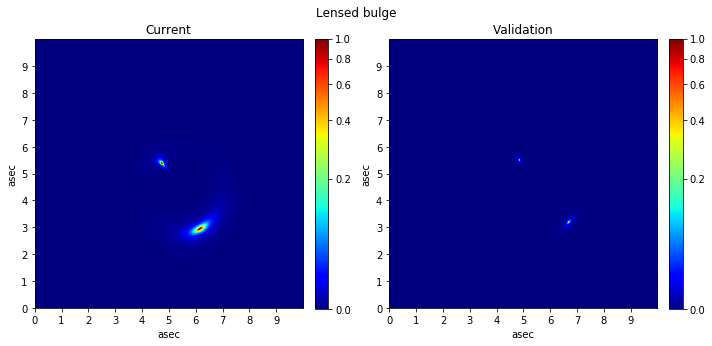

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Lensed bulge')
ticks = np.arange(0, 1000, 100)
tick_labels = np.arange(10)

norm = ImageNormalize(orig_img_arr, interval=MinMaxInterval(), stretch=AsinhStretch())

axes[0].set_title('Current')
orig_img = axes[0].imshow(orig_img_arr.T, origin='lower', norm=norm, cmap='jet')
axes[0].set_xlabel('asec')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(tick_labels)
axes[0].set_ylabel('asec')
axes[0].set_yticks(ticks)
axes[0].set_yticklabels(tick_labels)
fig.colorbar(orig_img, ax=axes[0], fraction=0.046, pad=0.04)

axes[1].set_title('Validation')
val_img = axes[1].imshow(val_img_arr, origin='lower', norm=norm, cmap='jet')
axes[1].set_xlabel('asec')
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(tick_labels)
axes[1].set_ylabel('asec')
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(tick_labels)
fig.colorbar(val_img, ax=axes[1], fraction=0.046, pad=0.04)

fig.tight_layout()

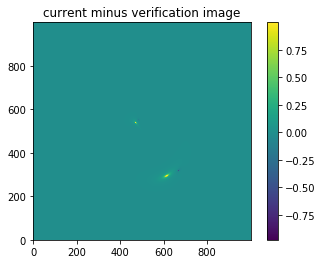

In [18]:
plt.imshow(orig_img_arr.T - val_img_arr, origin='lower')
plt.title('current minus verification image')
plt.colorbar()